# Telemonitoring for Parkinson's Diseas

In [65]:
# Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
# Tensorflow aliases
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import plot_model

In [67]:
data = pd.read_csv('../parkinsons_updrs.csv')

# Drop the subject # column because it is useless
data = data.drop('subject#', axis=1)

X = data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)
y = data['total_UPDRS']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly select 10% of the training data to be the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Original data: {len(X)}\nTraining set: {len(X_train)}\nValidation set: {len(X_val)}\nTesting set: {len(X_test)}")

Original data: 5875
Training set: 3760
Validation set: 940
Testing set: 1175


## Model building functions

In [ ]:
# Weight regularization to keep the weights small
def build_model(neurons, layers, input_shape, activation='linear', regularizer=None, lam=0.01, dropout=False, drop_prob=0.2, summarize=False):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  if regularizer != None:
    for i in range(layers-1):
      model.add(Dense(neurons, activation=activation, kernel_regularizer=regularizer(lam)))
      if dropout:
        model.add(Dropout(0.2)) # randomly select nodes with probability 0.2
  else:
    model.add(Dense(neurons, input_shape=input_shape))
    for i in range(layers-1):
      model.add(Dense(neurons, activation=activation))
  

  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam', metrics=['mae'])

  if summarize:
    model.build()
    model.summary()
    
  return model

## Training models

In [69]:
# model = build_model(4, 2, input_shape=(X_train.shape[1],), activation='relu', dropout=False, summarize=True)
# plot_model(model, show_shapes=True)

In [70]:
epochs=100
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

## Plotting functions

In [75]:
# Helper functions
def show_acc(h, e):
  plt.plot(range(e), h.history['mae'], label='Training')
  plt.plot(range(e), h.history['val_mae'], label='Validation')
  plt.ylim([0, np.max(h.history['mae'])+10])
  plt.legend()
  plt.show()

## Putting everything together

In [ ]:
def build_and_plot(neurons, layers, input_shape, activation='linear', regularizer=None, lam=0.01, dropout=False, drop_prob=0.2, summarize=False, e=100, verbose=0):
  model = build_model(neurons, layers, input_shape, activation=activation, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob=drop_prob, summarize=summarize)
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max mae: ", np.max(history.history['mae']))
  print("Min mae: ", np.min(history.history['mae']))
  print("Test MAE: ", model.evaluate(X_test, y_test))

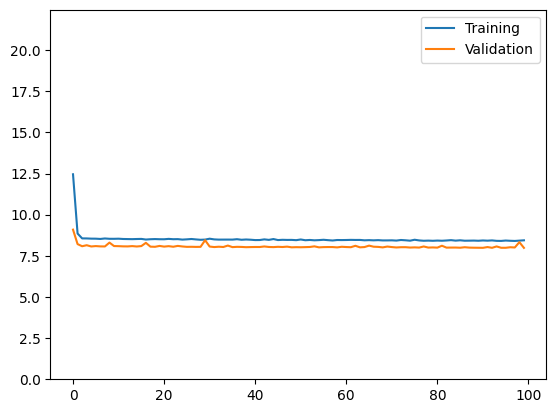

Max mae:  12.453775405883789
Min mae:  8.40451431274414
37/37 [==============================] - 0s 406us/step - loss: 8.1495 - mae: 8.1495
Test MAE:  [8.149500846862793, 8.149500846862793]


In [83]:
build_and_plot(4, 2, input_shape=(X_train.shape[1],), e=100, verbose=0)

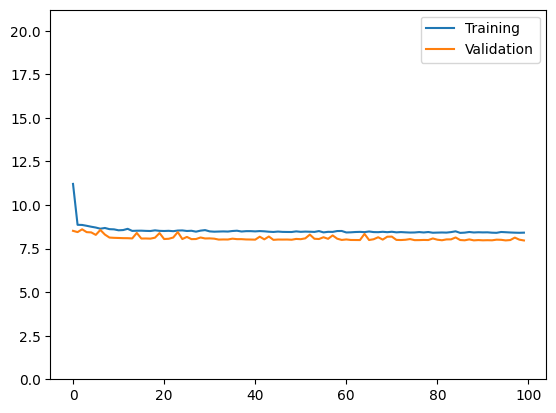

Max mae:  11.213150024414062
Min mae:  8.402262687683105
37/37 [==============================] - 0s 390us/step - loss: 8.1330 - mae: 8.1330
Test MAE:  [8.132997512817383, 8.132997512817383]


In [86]:
build_and_plot(neurons=8, layers=4, input_shape=(X_train.shape[1],), e=100, verbose=0)

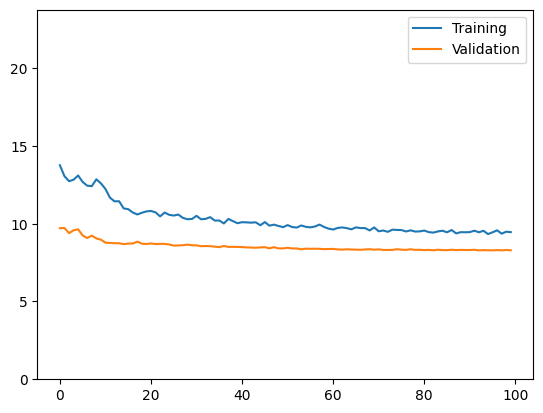

Max mae:  13.756536483764648
Min mae:  9.332504272460938
37/37 [==============================] - 0s 379us/step - loss: 8.3087 - mae: 8.3087
Test MAE:  [8.308700561523438, 8.308700561523438]


In [99]:
build_and_plot(neurons=8, layers=4, input_shape=(X_train.shape[1],), dropout=True, e=100, verbose=0)

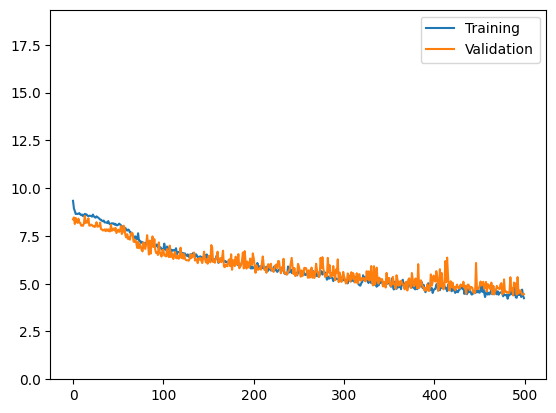

Max mae:  9.337099075317383
Min mae:  4.213245868682861
37/37 [==============================] - 0s 474us/step - loss: 4.4321 - mae: 4.4321
Test MAE:  [4.432124137878418, 4.432124137878418]


In [107]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)

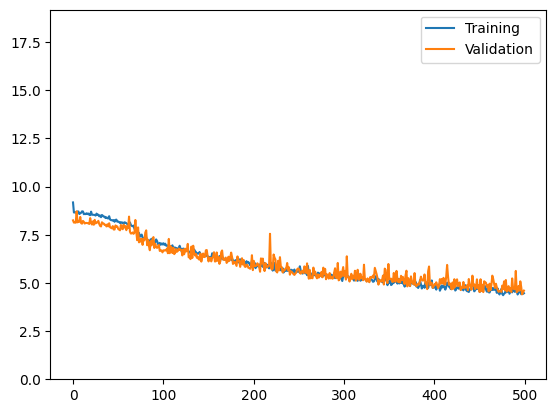

Max mae:  9.173876762390137
Min mae:  4.361062049865723
37/37 [==============================] - 0s 436us/step - loss: 4.5250 - mae: 4.5250
Test MAE:  [4.525002479553223, 4.525002479553223]


In [104]:
build_and_plot(neurons=64, layers=4, input_shape=(X_train.shape[1],), activation='leaky_relu', dropout=True, e=500, verbose=0)

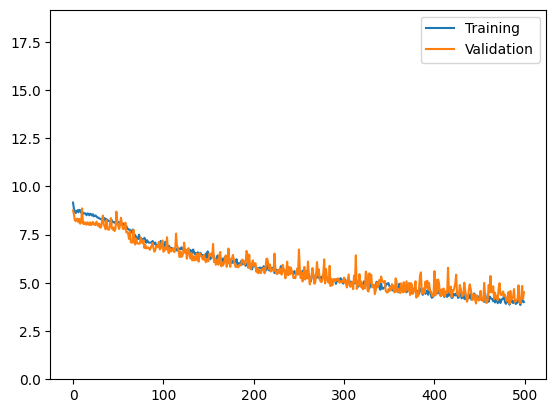

Max mae:  9.159039497375488
Min mae:  3.849797487258911
37/37 [==============================] - 0s 456us/step - loss: 4.5496 - mae: 4.5496
Test MAE:  [4.5496368408203125, 4.5496368408203125]


In [108]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='leaky_relu', dropout=False, e=500, verbose=0)

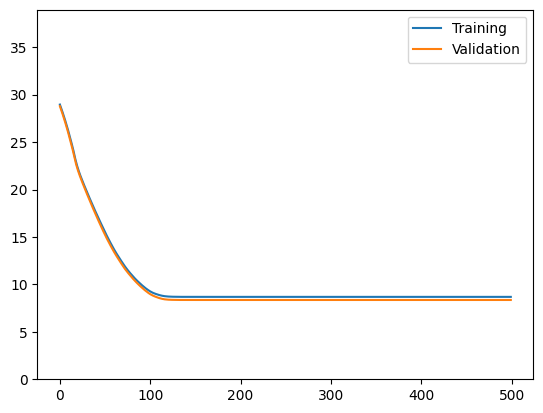

Max mae:  28.954477310180664
Min mae:  8.68502140045166
37/37 [==============================] - 0s 533us/step - loss: 8.4284 - mae: 8.4284
Test MAE:  [8.428386688232422, 8.428386688232422]


In [109]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='softmax', dropout=False, e=500, verbose=0)

## Activations

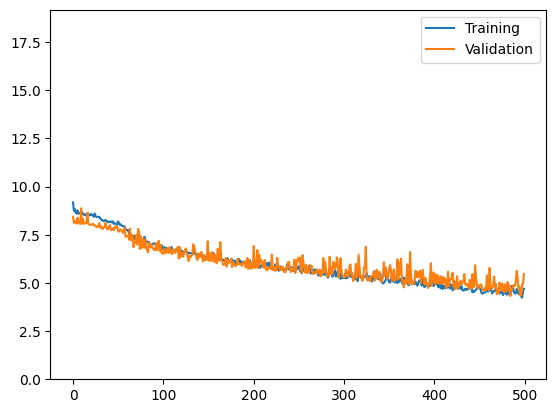

Max mae:  9.180485725402832
Min mae:  4.234187602996826
37/37 [==============================] - 0s 516us/step - loss: 5.2147 - mae: 5.2147
Test MAE:  [5.214720249176025, 5.214720249176025]


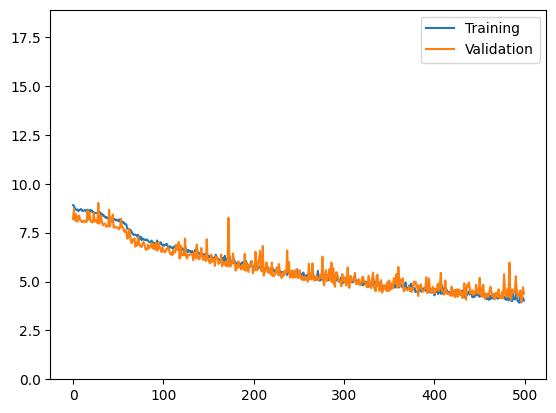

Max mae:  8.907873153686523
Min mae:  3.918393135070801
37/37 [==============================] - 0s 1ms/step - loss: 4.3053 - mae: 4.3053
Test MAE:  [4.305330753326416, 4.305330753326416]


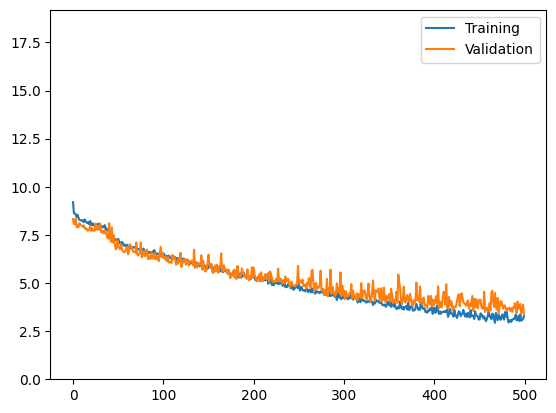

Max mae:  9.199725151062012
Min mae:  2.930434465408325
37/37 [==============================] - 0s 586us/step - loss: 3.5430 - mae: 3.5430
Test MAE:  [3.5430452823638916, 3.5430452823638916]


In [112]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='leaky_relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=500, verbose=0)

## Regularizers

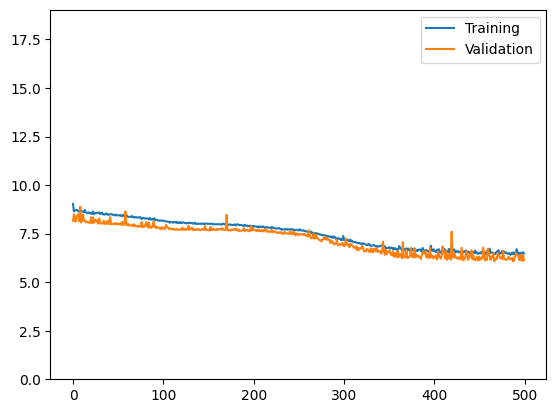

Max mae:  9.031005859375
Min mae:  6.405440807342529
37/37 [==============================] - 0s 427us/step - loss: 6.5288 - mae: 6.1438
Test MAE:  [6.528827667236328, 6.1437764167785645]


In [110]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='relu', dropout=False, e=500, verbose=0)

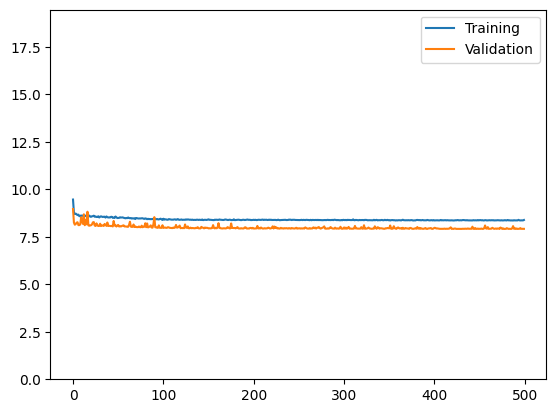

Max mae:  9.465807914733887
Min mae:  8.361282348632812
37/37 [==============================] - 0s 428us/step - loss: 8.2197 - mae: 8.1146
Test MAE:  [8.219654083251953, 8.114602088928223]


In [114]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l1, activation='relu', dropout=False, e=500, verbose=0)

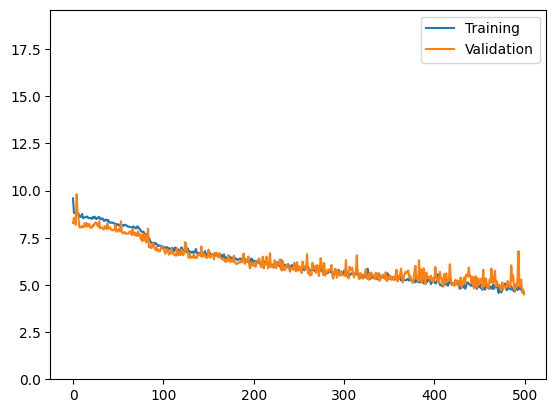

Max mae:  9.592015266418457
Min mae:  4.572912216186523
37/37 [==============================] - 0s 405us/step - loss: 4.6556 - mae: 4.6556
Test MAE:  [4.655594825744629, 4.655594825744629]


In [115]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=True, e=500, verbose=0)

## Neurons

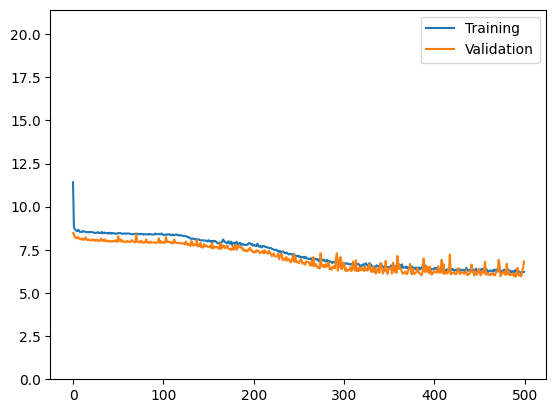

Max mae:  11.413575172424316
Min mae:  6.190226078033447
37/37 [==============================] - 0s 358us/step - loss: 6.6379 - mae: 6.6379
Test MAE:  [6.637918472290039, 6.637918472290039]


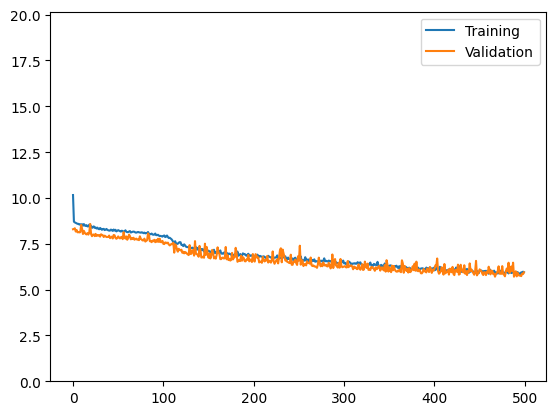

Max mae:  10.157073020935059
Min mae:  5.8274335861206055
37/37 [==============================] - 0s 352us/step - loss: 5.8747 - mae: 5.8747
Test MAE:  [5.874706268310547, 5.874706268310547]


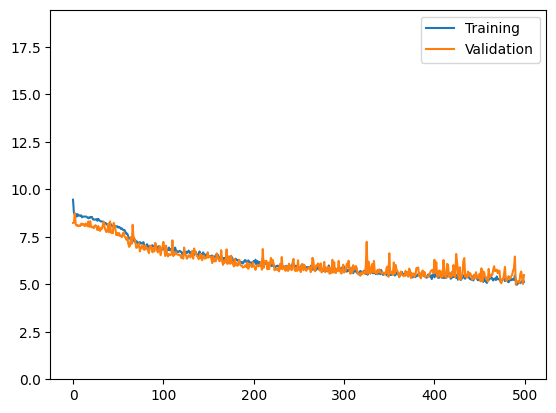

Max mae:  9.449095726013184
Min mae:  4.970128536224365
37/37 [==============================] - 0s 371us/step - loss: 5.6510 - mae: 5.6510
Test MAE:  [5.6510443687438965, 5.6510443687438965]


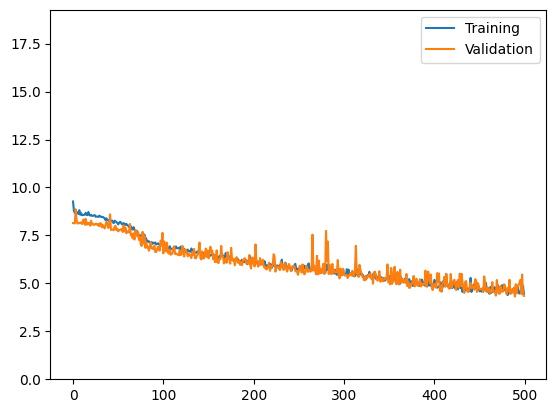

Max mae:  9.269463539123535
Min mae:  4.382941246032715
37/37 [==============================] - 0s 473us/step - loss: 4.2579 - mae: 4.2579
Test MAE:  [4.257923603057861, 4.257923603057861]


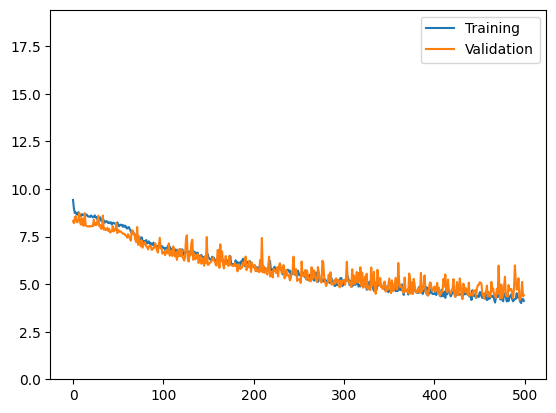

Max mae:  9.427580833435059
Min mae:  4.005385875701904
37/37 [==============================] - 0s 1ms/step - loss: 4.3224 - mae: 4.3224
Test MAE:  [4.322365760803223, 4.322365760803223]


In [116]:
build_and_plot(neurons=8, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=16, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=64, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=256, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)

## Layers

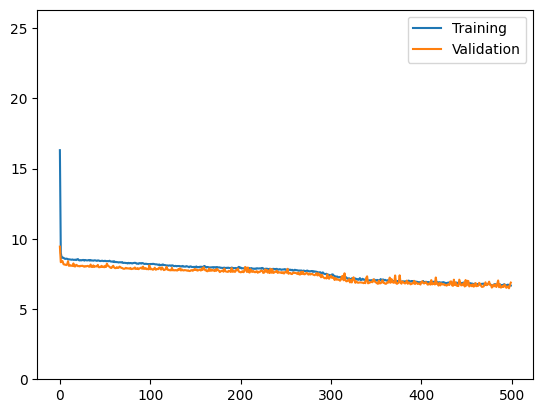

Max mae:  16.304264068603516
Min mae:  6.66917085647583
37/37 [==============================] - 0s 439us/step - loss: 6.6931 - mae: 6.6931
Test MAE:  [6.693112850189209, 6.693112850189209]


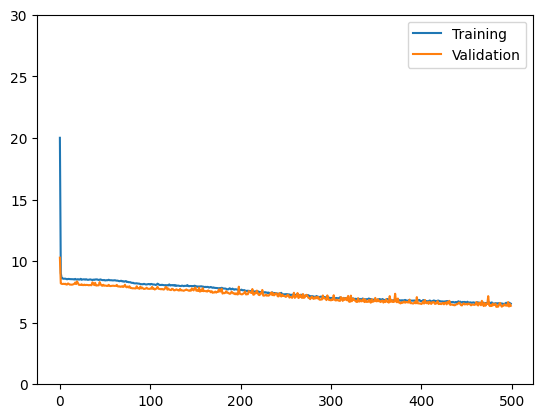

Max mae:  20.01936912536621
Min mae:  6.521427631378174
37/37 [==============================] - 0s 408us/step - loss: 6.3854 - mae: 6.3854
Test MAE:  [6.385387420654297, 6.385387420654297]


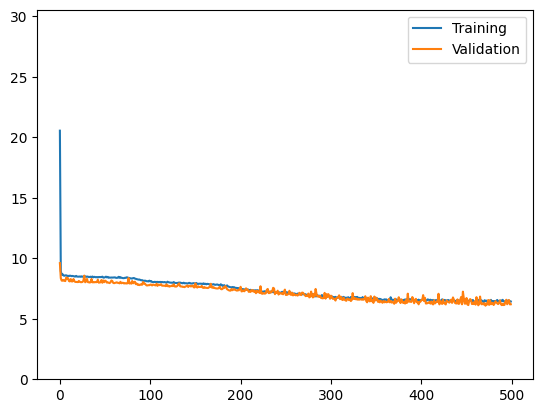

Max mae:  20.543806076049805
Min mae:  6.371632099151611
37/37 [==============================] - 0s 517us/step - loss: 6.2487 - mae: 6.2487
Test MAE:  [6.248655796051025, 6.248655796051025]


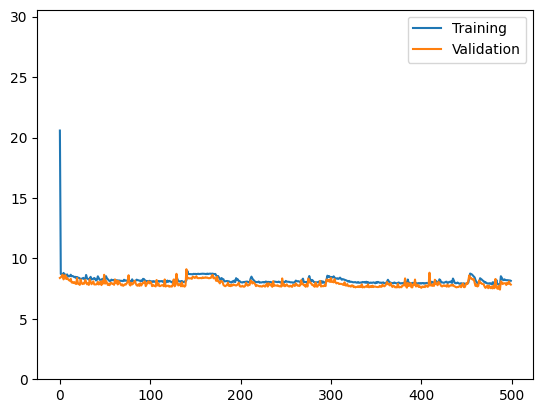

Max mae:  20.574861526489258
Min mae:  7.780808448791504
37/37 [==============================] - 0s 658us/step - loss: 7.9602 - mae: 7.9602
Test MAE:  [7.9602484703063965, 7.9602484703063965]


In [117]:
build_and_plot(neurons=8, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=8, layers=8, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=8, layers=16, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=8, layers=64, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)

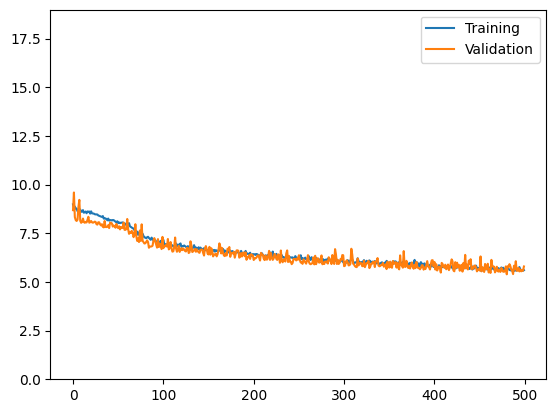

Max mae:  8.985989570617676
Min mae:  5.565843105316162
37/37 [==============================] - 0s 385us/step - loss: 5.8539 - mae: 5.8539
Test MAE:  [5.853885650634766, 5.853885650634766]


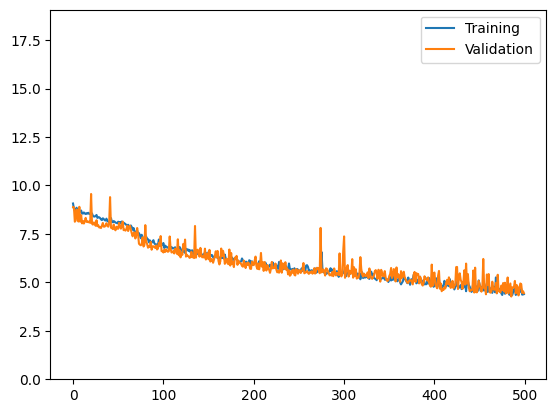

Max mae:  9.069607734680176
Min mae:  4.340452194213867
37/37 [==============================] - 0s 411us/step - loss: 4.4125 - mae: 4.4125
Test MAE:  [4.41248083114624, 4.41248083114624]


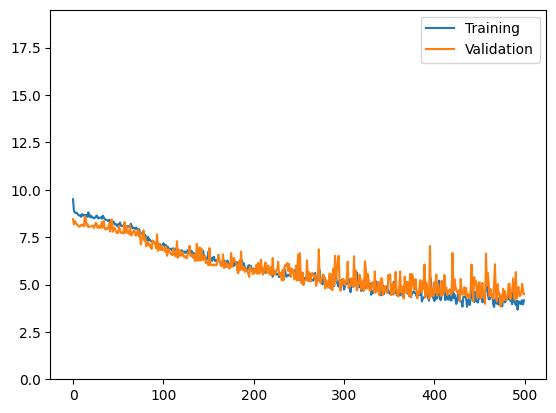

Max mae:  9.503949165344238
Min mae:  3.673912763595581
37/37 [==============================] - 0s 551us/step - loss: 4.5040 - mae: 4.5040
Test MAE:  [4.503975868225098, 4.503975868225098]


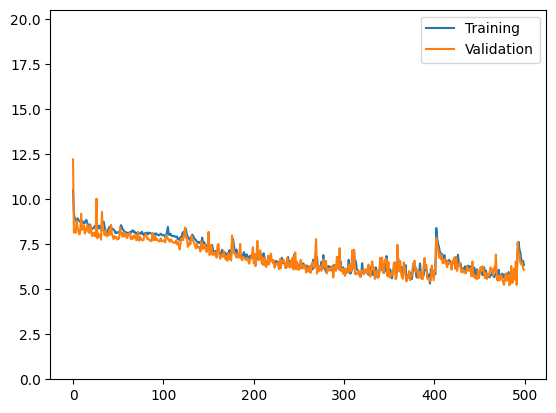

Max mae:  10.516657829284668
Min mae:  5.322443962097168
37/37 [==============================] - 0s 677us/step - loss: 6.2213 - mae: 6.2213
Test MAE:  [6.221268177032471, 6.221268177032471]


In [118]:
build_and_plot(neurons=128, layers=2, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=8, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=16, input_shape=(X_train.shape[1],), activation='relu', dropout=False, e=500, verbose=0)

## Epochs


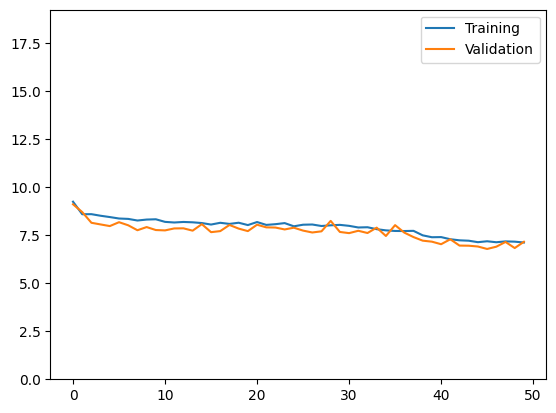

Max mae:  9.248305320739746
Min mae:  7.122124195098877
37/37 [==============================] - 0s 585us/step - loss: 7.1877 - mae: 7.1877
Test MAE:  [7.187650203704834, 7.187650203704834]


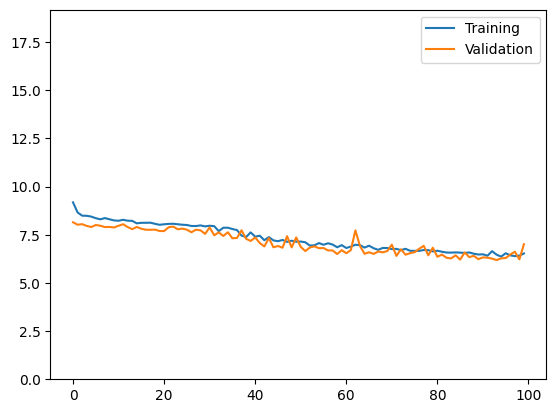

Max mae:  9.184475898742676
Min mae:  6.367550373077393
37/37 [==============================] - 0s 461us/step - loss: 6.9376 - mae: 6.9376
Test MAE:  [6.937643051147461, 6.937643051147461]


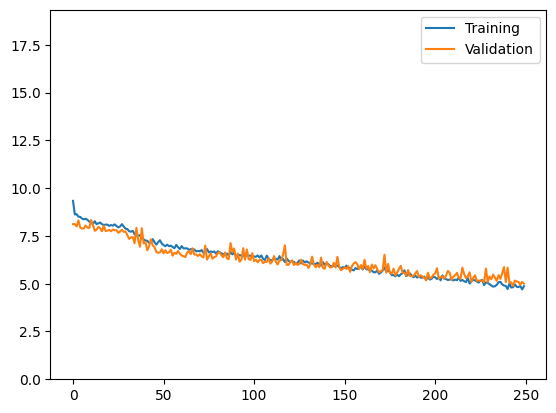

Max mae:  9.332878112792969
Min mae:  4.699962139129639
37/37 [==============================] - 0s 471us/step - loss: 5.0503 - mae: 5.0503
Test MAE:  [5.0503435134887695, 5.0503435134887695]


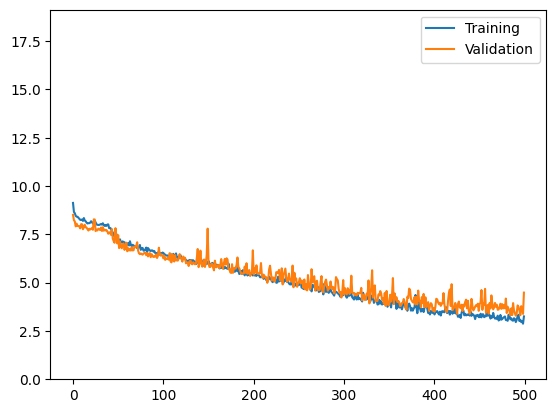

Max mae:  9.12564754486084
Min mae:  2.8755545616149902
37/37 [==============================] - 0s 499us/step - loss: 4.6304 - mae: 4.6304
Test MAE:  [4.630404472351074, 4.630404472351074]


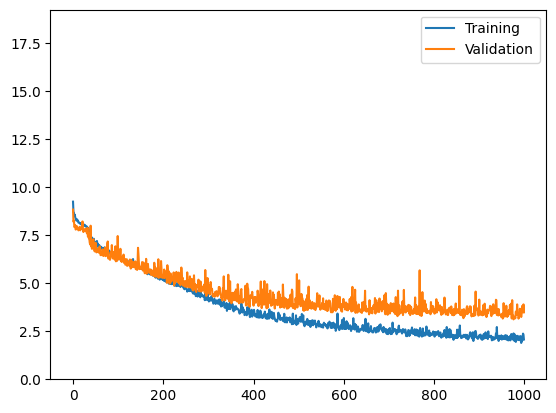

Max mae:  9.253000259399414
Min mae:  1.8929084539413452
37/37 [==============================] - 0s 598us/step - loss: 3.4636 - mae: 3.4636
Test MAE:  [3.4636070728302, 3.4636070728302]


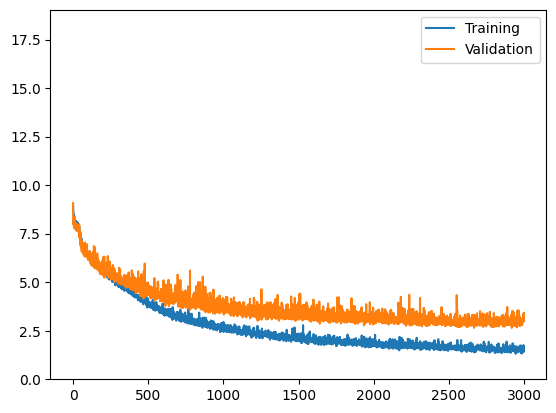

Max mae:  9.03619384765625
Min mae:  1.3177639245986938
37/37 [==============================] - 0s 501us/step - loss: 3.4277 - mae: 3.4277
Test MAE:  [3.4277262687683105, 3.4277262687683105]


In [119]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=50, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=100, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=250, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=500, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=3000, verbose=0)

## Add in regularizers

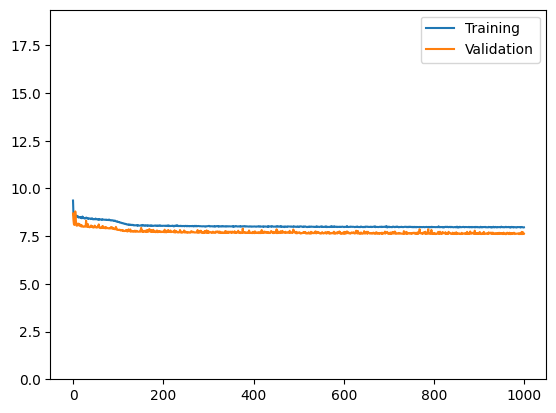

Max mae:  9.3649320602417
Min mae:  7.950933933258057
37/37 [==============================] - 0s 516us/step - loss: 7.8917 - mae: 7.7367
Test MAE:  [7.891712188720703, 7.736710548400879]


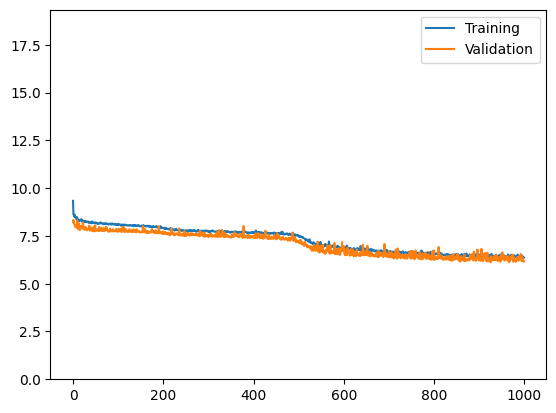

Max mae:  9.335367202758789
Min mae:  6.358978271484375
37/37 [==============================] - 0s 475us/step - loss: 6.6204 - mae: 6.1611
Test MAE:  [6.620396137237549, 6.161112308502197]


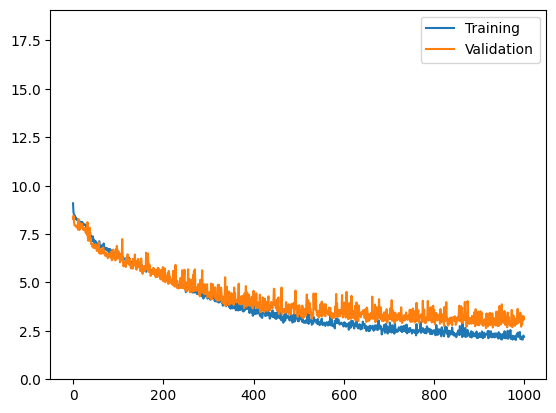

Max mae:  9.091107368469238
Min mae:  2.0313096046447754
37/37 [==============================] - 0s 536us/step - loss: 3.2047 - mae: 3.2047
Test MAE:  [3.2047030925750732, 3.2047030925750732]


In [121]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l1, activation='elu', dropout=False, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='elu', dropout=False, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, e=1000, verbose=0)

## L2 regularizer + more epochs

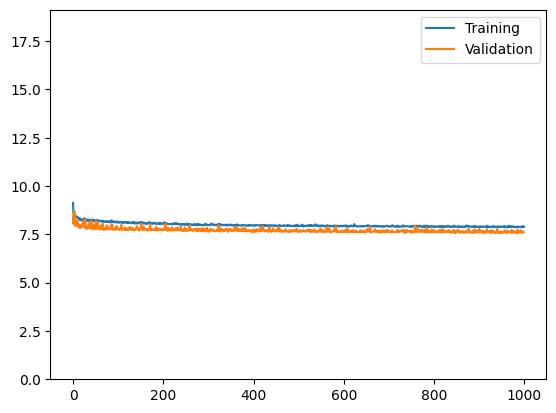

Max mae:  9.12496280670166
Min mae:  7.858520984649658
37/37 [==============================] - 0s 424us/step - loss: 7.8699 - mae: 7.7407
Test MAE:  [7.869914531707764, 7.740731239318848]


In [122]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='elu', dropout=False, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='elu', dropout=False, e=3000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='elu', dropout=False, e=5000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), regularizer=l2, activation='elu', dropout=False, e=10000, verbose=0)

## Dropout

In [ ]:
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.05, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.1 e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.2, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.3, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.4, e=1000, verbose=0)
build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=True, drop_prob=0.5, e=1000, verbose=0)

## Best models

In [120]:
# build_and_plot(neurons=128, layers=4, input_shape=(X_train.shape[1],), activation='elu', dropout=False, e=500, verbose=0)

In [ ]:
# import matplotlib.pyplot as plt
# # Create subplots
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
# axes = axes.flatten() # flatten the axes array to iterate over it easily

# # Plot each column against total_UPDRS
# i = 0
# for column in data.columns:
#   if column == 'total_UPDRS' or column == 'motor_UPDRS':
#     continue
#   ax = axes[i] # select the next subplot
#   ax.scatter(data[column], data['total_UPDRS'])
#   ax.set_ylabel('total_UPDRS')
#   ax.set_xlabel(column)
#   i += 1
    
# # Adjust spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()